# **Импортируем библиотеки**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataset_hh.csv to dataset_hh.csv


In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind

# **Парсинг вакансий с HeadHunter**

In [ ]:
keywords = [
    # Ключевые слова для "Международный бизнес"
    "международный бизнес", "международная торговля", "внешнеэкономическая деятельность",
    "экспорт", "импорт", "таможенное дело", "логистика", "международные отношения",
    "международные рынки", "международные проекты", "международное право",
    "международная экономика", "международные переговоры", "международные контракты",

    # Ключевые слова для "Финансы и инвестиции"
    "финансы", "инвестиции", "финансовый анализ", "финансовый менеджмент",
    "управление активами", "фондовый рынок", "ценные бумаги", "трейдинг",
    "финансовое планирование", "бюджетирование", "финансовая отчетность",
    "финансовый контроллинг", "инвестиционный анализ", "венчурные инвестиции",
    "управление портфелем", "рынок капитала", "финансовые рынки",
    "бухгалтер", "финансовый аналитик", "финансовый менеджер", "экономист", "аудитор",
    "кредитный специалист", "инвестиционный аналитик", "казначей", "налоговый консультант",
    "финансовый контроллер", "риск-менеджер", "специалист по МСФО", "специалист по бюджетированию",
    "специалист по финансовому планированию", "специалист по кассовым операциям",
    "специалист по валютному контролю", "специалист по страхованию", "специалист по финансовому учету",
    # Ключевые слова для "Количественная экономика"
    "количественная экономика", "эконометрика", "математическая экономика",
    "экономическое моделирование", "анализ данных", "статистика",
    "прогнозирование", "машинное обучение в экономике", "экономический анализ",
    "экономические исследования", "Big Data в экономике", "экономические модели",
    "количественные методы", "экономическая статистика",

    # Ключевые слова для "Управление компанией на основе данных"
    "управление данными", "data-driven management", "анализ данных",
    "бизнес-аналитика", "BI", "Business Intelligence", "управление на основе данных",
    "аналитика данных", "принятие решений на основе данных", "Data Science",
    "Big Data", "анализ бизнес-процессов", "управление эффективностью",
    "KPI", "метрики", "дата-аналитика", "дата-инжиниринг",
    # Маркетинг и реклама
    "маркетолог", "digital маркетолог", "SMM специалист", "контент-менеджер", "копирайтер",
    "SEO специалист", "PPC специалист", "email маркетолог", "аналитик маркетинга", "бренд-менеджер",
    "PR менеджер", "медиабайер", "арт-директор", "креативный директор", "event менеджер",
    "специалист по интернет-рекламе", "трафик-менеджер", "специалист по контекстной рекламе",
    "специалист по таргетированной рекламе", "специалист по продвижению в социальных сетях",
]
cities = {
    "Москва": 1,
    "Санкт-Петербург": 2,
}

vacancies = []

def get_employer_rating(employer_id):
    url = f"https://api.hh.ru/employers/{employer_id}"
    response = requests.get(url)
    if response.status_code == 200:
        employer_data = response.json()
        return employer_data.get("rating", "Не указано")
    return "Не указано"

def get_work_schedule(schedule_id):
    schedules = {
        "fullDay": "Полный день",
        "shift": "Сменный график",
        "flexible": "Гибкий график",
        "remote": "Удаленная работа",
        "flyInFlyOut": "Вахтовый метод"
    }
    return schedules.get(schedule_id, "Не указано")

def get_employment_type(employment_id):
    employments = {
        "full": "Полная занятость",
        "part": "Частичная занятость",
        "project": "Проектная работа",
        "volunteer": "Волонтерство",
        "probation": "Стажировка"
    }
    return employments.get(employment_id, "Не указано")

def fetch_vacancies(keyword, city_id, city_name):
    url = "https://api.hh.ru/vacancies"
    params = {
        "text": keyword,
        "area": city_id,
        "page": 0,
        "per_page": 100
    }

    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        for item in data["items"]:
            salary = item.get("salary")
            salary_from = salary.get("from") if salary else None
            salary_to = salary.get("to") if salary else None
            salary_currency = salary.get("currency") if salary else None
            experience = item.get("experience", {}).get("name", "Не указано")
            snippet_requirement = item.get("snippet", {}).get("requirement", "Не указано")
            employer_id = item.get("employer", {}).get("id")
            employer_rating = get_employer_rating(employer_id) if employer_id else "Не указано"
            schedule = item.get("schedule", {}).get("id")
            work_schedule = get_work_schedule(schedule) if schedule else "Не указано"
            employment = item.get("employment", {}).get("id")
            employment_type = get_employment_type(employment) if employment else "Не указано"
            vacancies.append({
                "Ключевое слово": keyword,
                "Город": city_name,
                "Название вакансии": item.get("name"),
                "Компания": item.get("employer", {}).get("name"),
                "Зарплата от": salary_from,
                "Зарплата до": salary_to,
                "Валюта": salary_currency,
                "Опыт работы": experience,
                "Требования": snippet_requirement,
                "Рейтинг работодателя": employer_rating,
                "Формат работы": work_schedule,
                "Тип занятости": employment_type,
                "Ссылка": item.get("alternate_url")
            })
    else:
        print(f"Ошибка при запросе: {response.status_code}")

for keyword in keywords:
    for city_name, city_id in cities.items():
        print(f"Ищем вакансии по запросу '{keyword}' в городе {city_name}...")
        fetch_vacancies(keyword, city_id, city_name)
df = pd.DataFrame(vacancies)
df.to_csv("vacancies_with_rating_schedule_and_employment.csv", index=False, encoding="utf-8-sig")

In [ ]:
df = df.dropna(subset=["Зарплата до"], how="all")
df = df.reset_index(drop=True)
df.index = df.index + 1
df

In [ ]:
df = df.dropna(subset=["Зарплата от"], how="all")
df = df.reset_index(drop=True)
df.index = df.index + 1
df

# **Подготовка данных и описательная статистика**

In [3]:
df = pd.read_csv('dataset_hh.csv')

categorical_columns = ['Город', 'Опыт работы', 'Формат работы', 'Тип занятости', 'направление']
for col in categorical_columns:
    df[col] = df[col].astype('category')

df['Зарплата от'] = df['Зарплата от'].fillna(df['Зарплата от'].median())
df['Зарплата до'] = df['Зарплата до'].fillna(df['Зарплата до'].median())
df['Город'] = df['Город'].fillna(df['Город'].mode()[0])
df['Формат работы'] = df['Формат работы'].fillna(df['Формат работы'].mode()[0])
df['Тип занятости'] = df['Тип занятости'].fillna(df['Тип занятости'].mode()[0])
df['направление'] = df['направление'].fillna(df['направление'].mode()[0])
df.drop_duplicates(inplace=True)

df['Формат работы объединенный'] = df['Формат работы'].apply(lambda x: 'Офлайн' if x != 'Удаленная работа' else 'Удаленная работа')

Q1 = df['Зарплата от'].quantile(0.25)
Q3 = df['Зарплата от'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Зарплата от'] >= (Q1 - 1.5 * IQR)) & (df['Зарплата от'] <= (Q3 + 1.5 * IQR))]
Q1 = df['Зарплата до'].quantile(0.25)
Q3 = df['Зарплата до'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Зарплата до'] >= (Q1 - 1.5 * IQR)) & (df['Зарплата до'] <= (Q3 + 1.5 * IQR))]

cities = ['Москва', 'Санкт-Петербург']
directions = ['Международный бизнес', 'Финансы и инвестиции', 'Количественная экономика', 'Маркетинг', 'Управление компанией на основе данных']

filtered_data = {}
for city in cities:
    df_city = df[df['Город'].str.contains(city, na=False)]
    filtered_data[f'{city} - Все направления'] = df_city

    for direction in directions:
        df_filtered = df_city[df_city['направление'].str.contains(direction, na=False)]
        filtered_data[f'{city} - {direction}'] = df_filtered

filtered_data['Удаленная работа'] = df[df['Формат работы'].str.contains('Удаленная работа', na=False)]
filtered_data['Офлайн'] = df[~df['Формат работы'].str.contains('Удаленная работа', na=False, regex=False)]

def get_stats(df, name):
    return pd.Series({
        'Количество вакансий': df['Название вакансии'].count(),
        'Мин. зарплата от': df['Зарплата от'].min(),
        'Макс. зарплата от': df['Зарплата от'].max(),
        'Мин. зарплата до': df['Зарплата до'].min(),
        'Макс. зарплата до': df['Зарплата до'].max(),
        'Квантиль 25% зарплата от': df['Зарплата от'].quantile(0.25),
        'Квантиль 75% зарплата от': df['Зарплата от'].quantile(0.75),
        'Квантиль 25% зарплата до': df['Зарплата до'].quantile(0.25),
        'Квантиль 75% зарплата до': df['Зарплата до'].quantile(0.75),
        'Медиана зарплата от': df['Зарплата от'].median(),
        'Медиана зарплата до': df['Зарплата до'].median(),
        'Мода зарплата от': df['Зарплата от'].mode()[0],
        'Мода зарплата до': df['Зарплата до'].mode()[0],
        'Средняя зарплата от': df['Зарплата от'].mean(),
        'Средняя зарплата до': df['Зарплата до'].mean(),
        'Стд. отклонение зарплата от': df['Зарплата от'].std(),
        'Стд. отклонение зарплата до': df['Зарплата до'].std(),
        'Дисперсия зарплата от': df['Зарплата от'].var(),
        'Дисперсия зарплата до': df['Зарплата до'].var()
    }, name=name)

stats_df = pd.DataFrame([get_stats(df, name) for name, df in filtered_data.items()])
print(stats_df)


                                                    Количество вакансий  \
Москва - Все направления                                         1816.0   
Москва - Международный бизнес                                     252.0   
Москва - Финансы и инвестиции                                     604.0   
Москва - Количественная экономика                                 224.0   
Москва - Маркетинг                                                563.0   
Москва - Управление компанией на основе данных                    173.0   
Санкт-Петербург - Все направления                                1856.0   
Санкт-Петербург - Международный бизнес                            258.0   
Санкт-Петербург - Финансы и инвестиции                            610.0   
Санкт-Петербург - Количественная экономика                        215.0   
Санкт-Петербург - Маркетинг                                       544.0   
Санкт-Петербург - Управление компанией на основ...                229.0   
Удаленная работа         

# **Визуализация**

<ipython-input-6-520e12e8eb2a>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.5, 1), loc='upper left', fontsize=10)


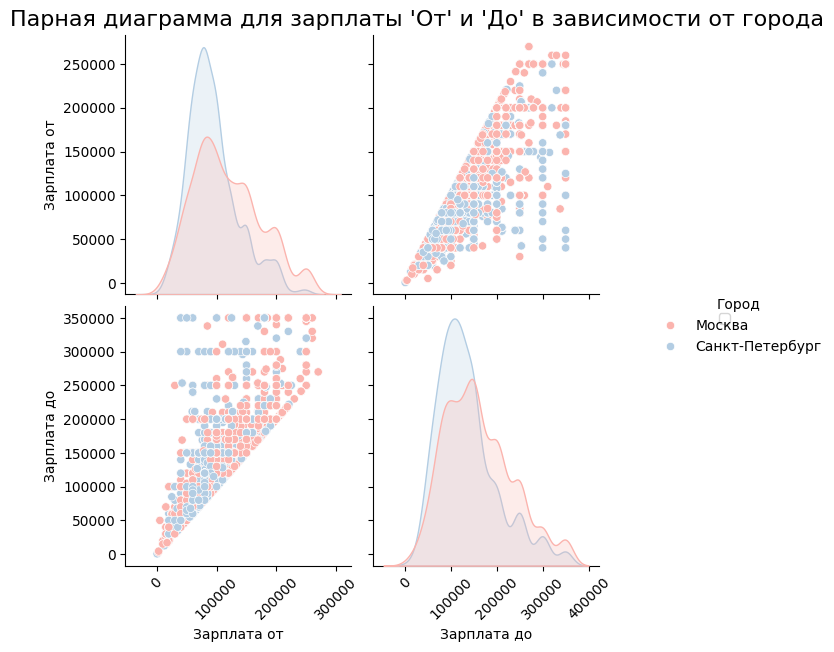

In [ ]:
df_filtered = df[['Город', 'Зарплата от', 'Зарплата до']]
g = sns.pairplot(df_filtered, hue='Город', palette='Pastel1', height=3)
plt.suptitle("Парная диаграмма для зарплаты 'От' и 'До' в зависимости от города", y=1.02, fontsize=16)
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper left', fontsize=10)
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45, labelsize=10)
plt.show()


<ipython-input-7-b0b3c509630f>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.5, 1), loc='upper left', fontsize=10)


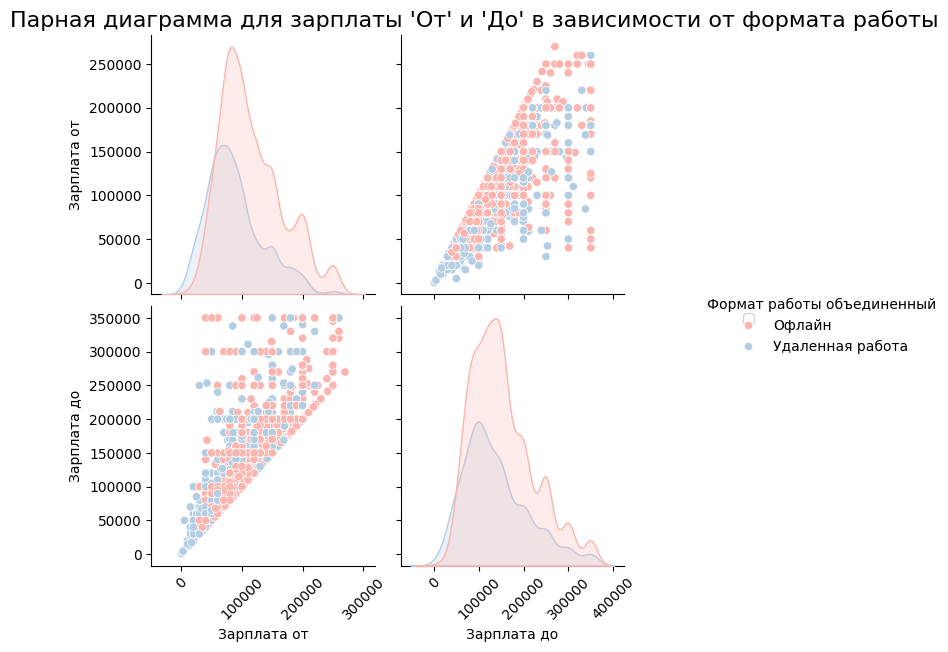

In [ ]:
df_filtered_format = df[['Формат работы объединенный', 'Зарплата от', 'Зарплата до']]
g = sns.pairplot(df_filtered_format, hue='Формат работы объединенный', palette='Pastel1', height=3)
plt.suptitle("Парная диаграмма для зарплаты 'От' и 'До' в зависимости от формата работы", y=1.02, fontsize=16)
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper left', fontsize=10)
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45, labelsize=10)
plt.show()

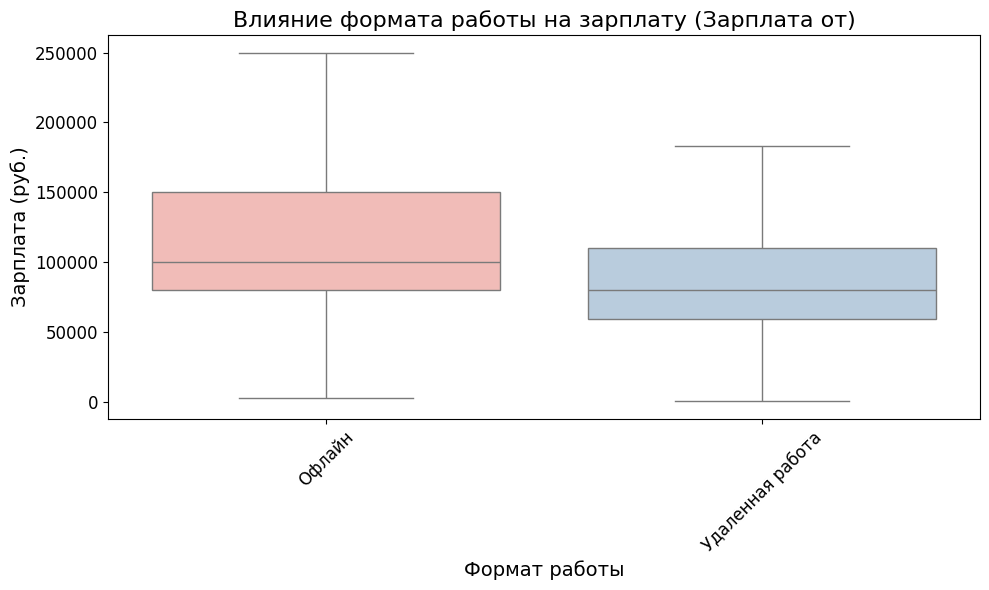

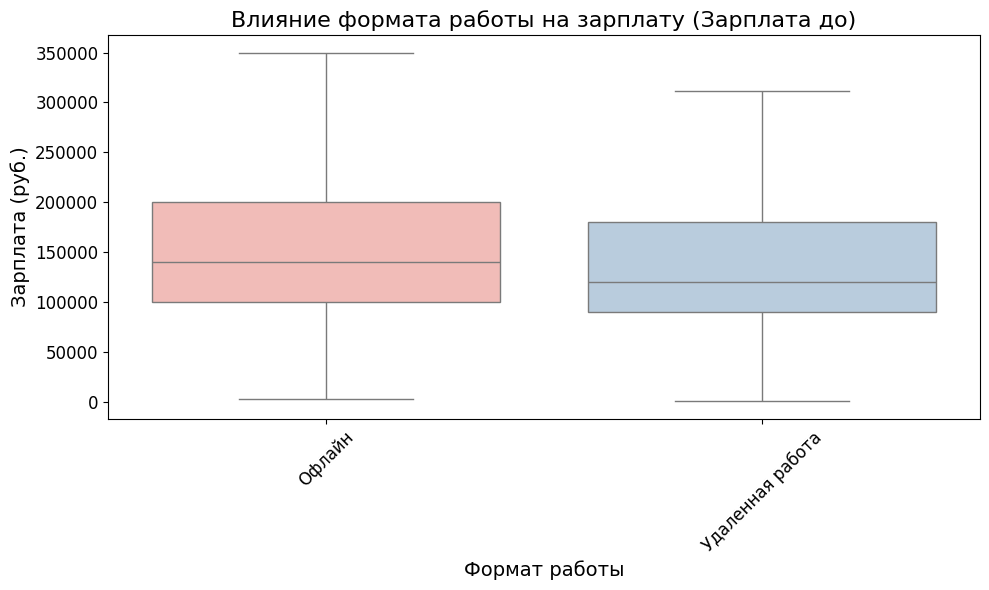

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,
    x='Формат работы объединенный',
    y='Зарплата от',
    hue='Формат работы объединенный',
    palette="Pastel1",
    showfliers=False)
plt.title('Влияние формата работы на зарплату (Зарплата от)', fontsize=16)
plt.xlabel('Формат работы', fontsize=14)
plt.ylabel('Зарплата (руб.)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df,
    x='Формат работы объединенный',
    y='Зарплата до',
    hue='Формат работы объединенный',
    palette="Pastel1",
    showfliers=False)
plt.title('Влияние формата работы на зарплату (Зарплата до)', fontsize=16)
plt.xlabel('Формат работы', fontsize=14)
plt.ylabel('Зарплата (руб.)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

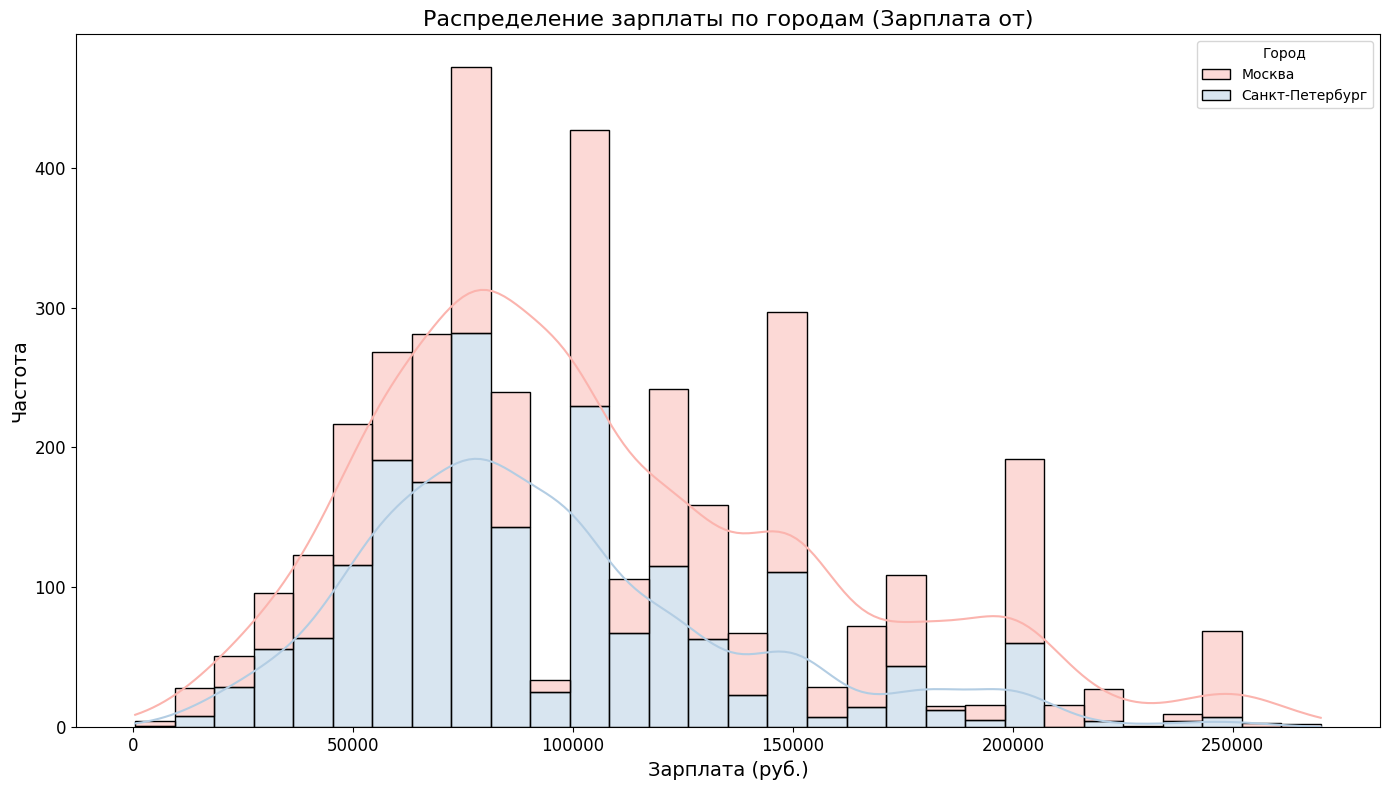

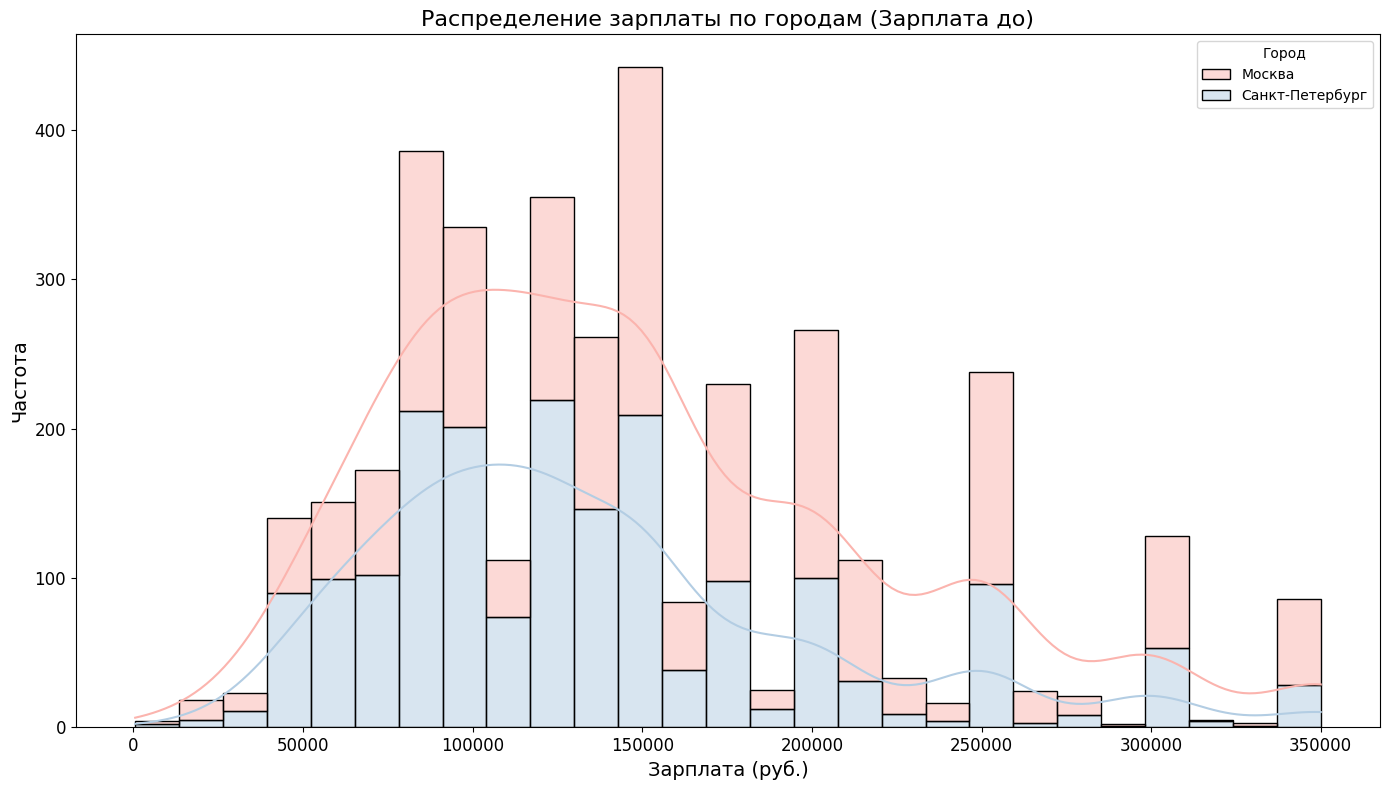

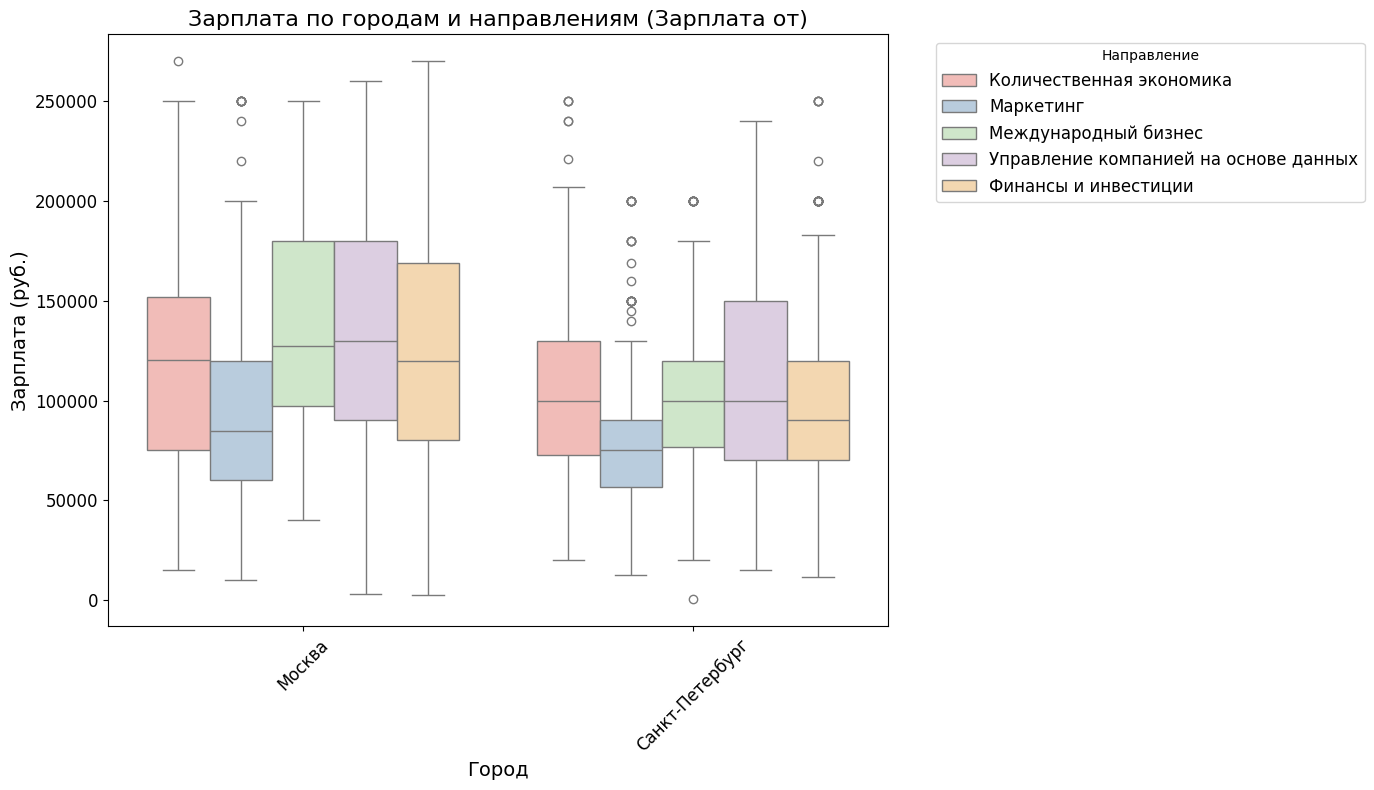

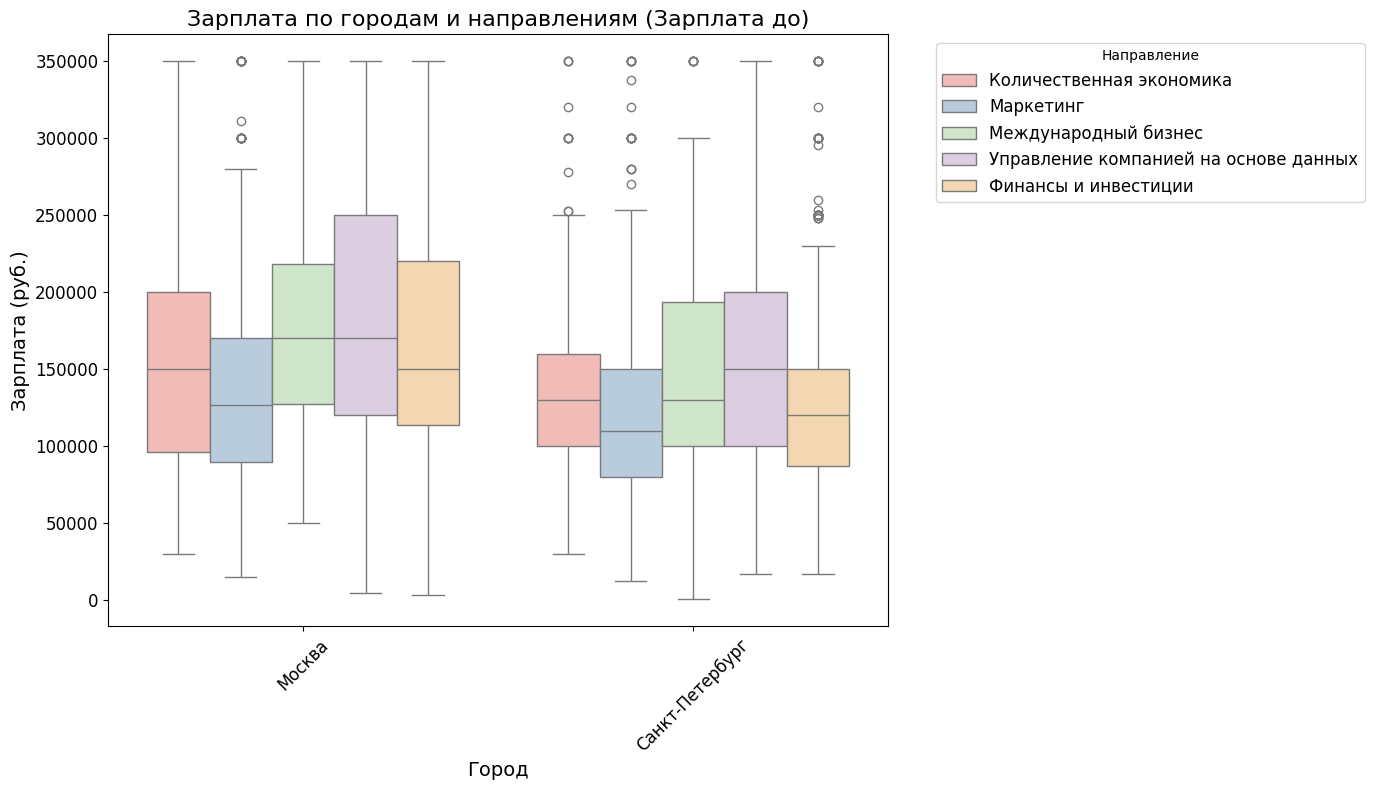

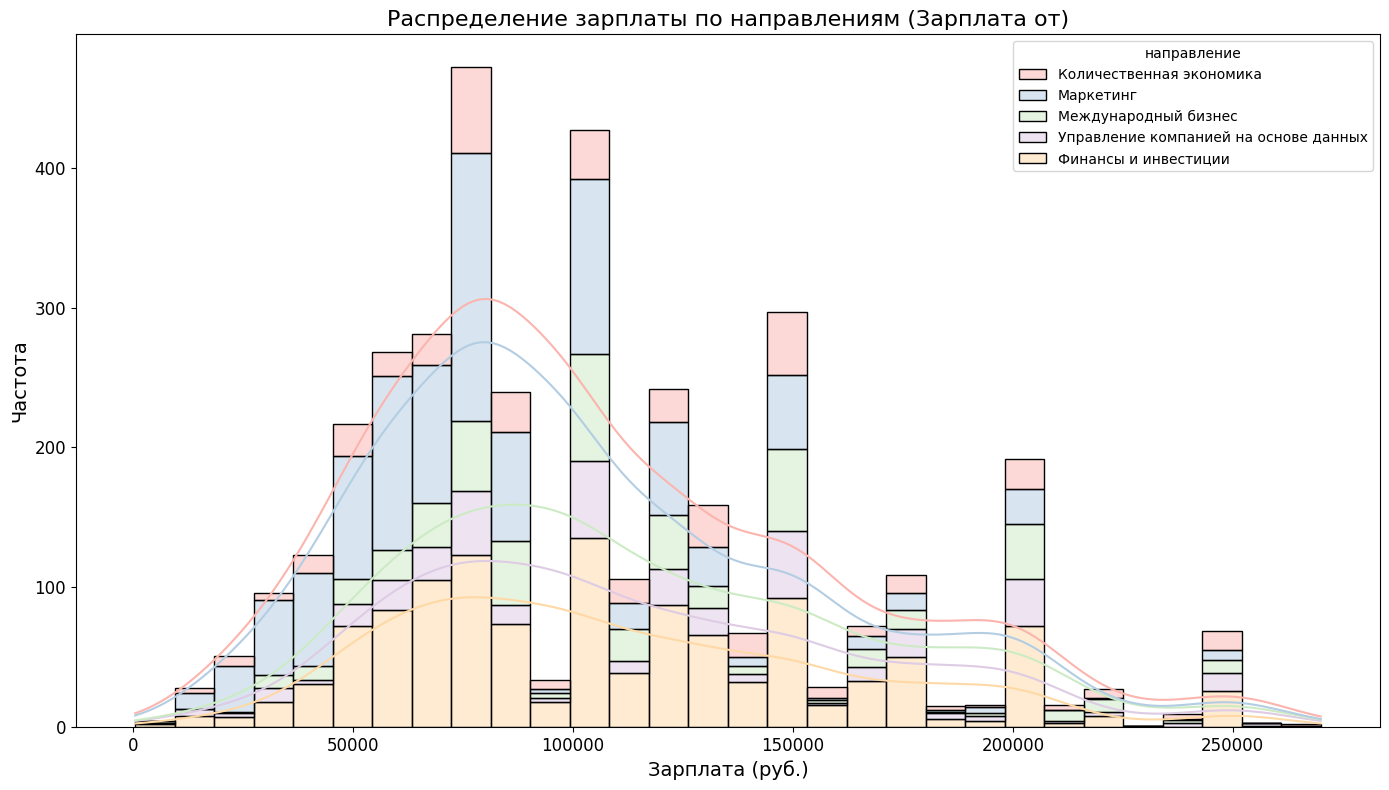

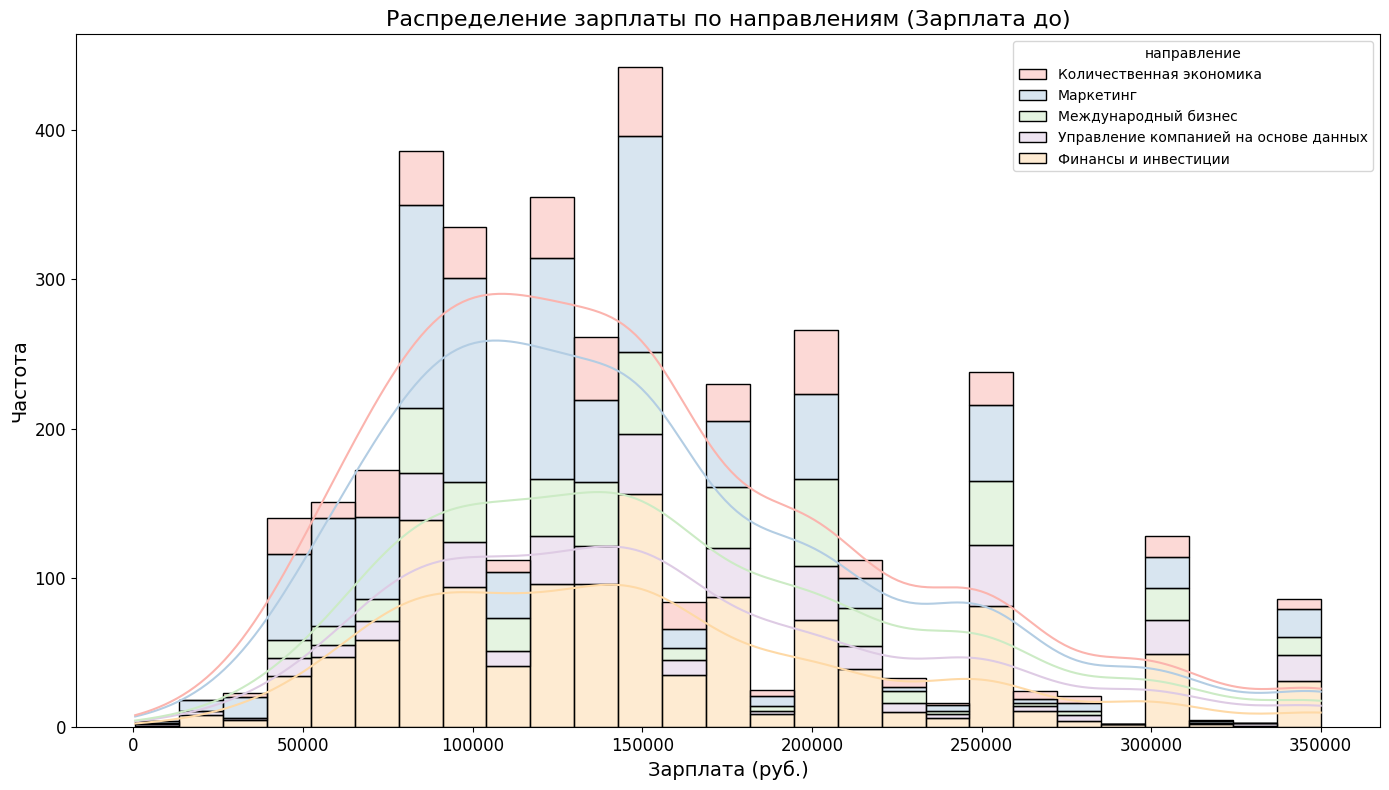

In [ ]:
plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='Зарплата от', hue='Город', multiple='stack', kde=True, palette="Pastel1")
plt.title('Распределение зарплаты по городам (Зарплата от)', fontsize=16)
plt.xlabel('Зарплата (руб.)', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='Зарплата до', hue='Город', multiple='stack', kde=True, palette="Pastel1")
plt.title('Распределение зарплаты по городам (Зарплата до)', fontsize=16)
plt.xlabel('Зарплата (руб.)', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Город', y='Зарплата от', hue='направление', palette="Pastel1")
plt.title('Зарплата по городам и направлениям (Зарплата от)', fontsize=16)
plt.xlabel('Город', fontsize=14)
plt.ylabel('Зарплата (руб.)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Направление', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Город', y='Зарплата до', hue='направление', palette="Pastel1")
plt.title('Зарплата по городам и направлениям (Зарплата до)', fontsize=16)
plt.xlabel('Город', fontsize=14)
plt.ylabel('Зарплата (руб.)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Направление', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='Зарплата от', hue='направление', multiple='stack', kde=True, palette="Pastel1")
plt.title('Распределение зарплаты по направлениям (Зарплата от)', fontsize=16)
plt.xlabel('Зарплата (руб.)', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='Зарплата до', hue='направление', multiple='stack', kde=True, palette="Pastel1")
plt.title('Распределение зарплаты по направлениям (Зарплата до)', fontsize=16)
plt.xlabel('Зарплата (руб.)', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# **Проверка гипотез**

In [4]:
df['Средняя зарплата'] = df[['Зарплата от', 'Зарплата до']].mean(axis=1)
df

,№,Город,Название вакансии,Компания,Зарплата от,Зарплата до,Опыт работы,Требования,Формат работы,Тип занятости,Ссылка,направление,Формат работы объединенный,Средняя зарплата
2,3,Москва,Помощник/ассистент руководителя,ЗАВОД НАРТИС,200000,200000,От 3 до 6 лет,Разговорный английский желателен. Курсы <highl...,Полный день,Полная занятость,https://hh.ru/vacancy/118088420,Международный бизнес,Офлайн,200000.0
3,4,Москва,Финансовый менеджер,March HR Services CIS,200000,230000,От 3 до 6 лет,Знание основ бухгалтерского учета и отчетности...,Полный день,Полная занятость,https://hh.ru/vacancy/118426718,Международный бизнес,Офлайн,215000.0
4,5,Москва,Специалист по делопроизводству,МФК Фордевинд,80000,90000,От 1 года до 3 лет,Высшее образование. Опыт работы в сфере докуме...,Полный день,Полная занятость,https://hh.ru/vacancy/117652322,Международный бизнес,Офлайн,85000.0
5,6,Москва,Менеджер по продажам,Мастер Бэринг,150000,200000,От 1 года до 3 лет,"...х лет, переговоров и сопровождении сделок с...",Полный день,Полная занятость,https://hh.ru/vacancy/117552833,Международный бизнес,Офлайн,175000.0
7,8,Москва,Личный ассистент family office,Smart And Talented,170000,230000,Более 6 лет,Релевантный опыт работы от семи лет в family o...,Удаленная работа,Полная занятость,https://hh.ru/vacancy/118458178,Международный бизнес,Удаленная работа,200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,4112,Санкт-Петербург,СММ-менеджер / Контент-менеджер,Топго Сервис,80000,120000,От 1 года до 3 лет,...рекламу <highlighttext>в</highlighttext> со...,Полный день,Полная занятость,https://hh.ru/vacancy/116794891,Маркетинг,Офлайн,100000.0
4112,4113,Санкт-Петербург,SMM-специалист в колледж,ЭДУТЕХ ГРУПП,60000,95000,От 1 года до 3 лет,Опыт ведения соцсетей — <highlighttext>в</high...,Полный день,Полная занятость,https://hh.ru/vacancy/117537466,Маркетинг,Офлайн,77500.0
4113,4114,Санкт-Петербург,Специалист отдела по работе с социальными медиа,ФГБОУ ВО Санкт-Петербургский государственный у...,56500,67800,От 1 года до 3 лет,Приветствуется опыт работы <highlighttext>в</h...,Полный день,Полная занятость,https://hh.ru/vacancy/117491721,Маркетинг,Офлайн,62150.0
4114,4115,Санкт-Петербург,SMM-менеджер / Контент-маркетолог (товары для ...,Рыбницкая Юлия Андреевна,60000,90000,От 1 года до 3 лет,Релевантный опыт работы <highlighttext>в</high...,Удаленная работа,Полная занятость,https://hh.ru/vacancy/117641136,Маркетинг,Удаленная работа,75000.0


In [5]:
#Гипотеза о влиянии направления подготовки на мат ожидание зарплаты
#ANOVA для проверки различий в средних зарплатах между направлениями
average_salary = df["Средняя зарплата"]
model = smf.ols('average_salary ~ C(направление)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA таблица для 'Средняя зарплата':")
print(anova_table)

ANOVA таблица для 'Средняя зарплата':
                      sum_sq      df         F        PR(>F)
C(направление)  6.756366e+11     4.0  51.73346  1.915877e-42
Residual        1.197271e+13  3667.0       NaN           NaN


F-статистика:

Значение F-статистик значительно больше 1, что указывает на то, что различия между группами (направлениями подготовки) существенны по сравнению с вариациями внутри групп.

p-value:

p-value крайне мал (гораздо меньше стандартного уровня значимости 0.05). Это означает, что вероятность того, что различия между группами возникли случайно, практически нулевая.

In [6]:
unique_values = df['Опыт работы'].unique()
print(unique_values)

['От 3 до 6 лет', 'От 1 года до 3 лет', 'Более 6 лет', 'Нет опыта']
Categories (4, object): ['Более 6 лет', 'Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет']


In [7]:
# Регрессия для оценки влияния на зарплату
average_salary = df["Средняя зарплата"]
model = smf.ols('average_salary ~ C(направление)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         average_salary   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     51.73
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           1.92e-42
Time:                        10:23:42   Log-Likelihood:                -45428.
No. Observations:                3672   AIC:                         9.087e+04
Df Residuals:                    3667   BIC:                         9.090e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [8]:
#### 2. Влияние географического положения на уровень зарплаты
average_salary = df["Средняя зарплата"]

# Регрессия
model = smf.ols('average_salary ~ C(Город)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         average_salary   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     158.3
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           1.44e-35
Time:                        10:23:45   Log-Likelihood:                -45451.
No. Observations:                3672   AIC:                         9.091e+04
Df Residuals:                    3670   BIC:                         9.092e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [9]:
average_salary = df["Средняя зарплата"]

def categorize_experience(exp):
    if 'Нет опыта' in exp:
        return 0
    elif 'От 1 года до 3 лет' in exp:
        return 2
    elif 'От 3 до 6 лет' in exp:
        return 4.5
    elif 'Более 6 лет' in exp:
        return 6
    else:
        return None

df['численный_опыт'] = df['Опыт работы'].apply(categorize_experience)
df = df.dropna(subset=['численный_опыт'])

model_simple = smf.ols('average_salary ~ численный_опыт', data=df).fit()
print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:         average_salary   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     526.8
Date:                Tue, 25 Mar 2025   Prob (F-statistic):          1.14e-284
Time:                        10:23:49   Log-Likelihood:                -44871.
No. Observations:                3672   AIC:                         8.975e+04
Df Residuals:                    3668   BIC:                         8.978e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.916e+

In [10]:
#Модель без взаимодействия
average_salary = df["Средняя зарплата"]
df["численный_опыт"] = df["численный_опыт"].astype(float)
model_basic = smf.ols(
    formula="average_salary ~ C(направление) + численный_опыт + C(Город)",
    data=df
).fit()

print(model_basic.summary())

                            OLS Regression Results                            
Dep. Variable:         average_salary   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     345.5
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:23:52   Log-Likelihood:                -44706.
No. Observations:                3672   AIC:                         8.943e+04
Df Residuals:                    3665   BIC:                         8.947e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [11]:
#Модель с взаимодействием направления и опыта
model_interaction_dir_exp = smf.ols(
    formula="average_salary ~ C(направление)*численный_опыт + C(Город)",
    data=df
).fit()

print(model_interaction_dir_exp.summary())

                            OLS Regression Results                            
Dep. Variable:         average_salary   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     212.6
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:23:55   Log-Likelihood:                -44688.
No. Observations:                3672   AIC:                         8.940e+04
Df Residuals:                    3661   BIC:                         8.947e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------


T-тест для удалённой и офлайн работы: T-statistic=8.662474611770154, P-value=6.807834405259075e-18
Средний диапазон зарплат для удалённой работы: 50289.74868322047
Средний диапазон зарплат для офлайн работы: 37876.12548015365


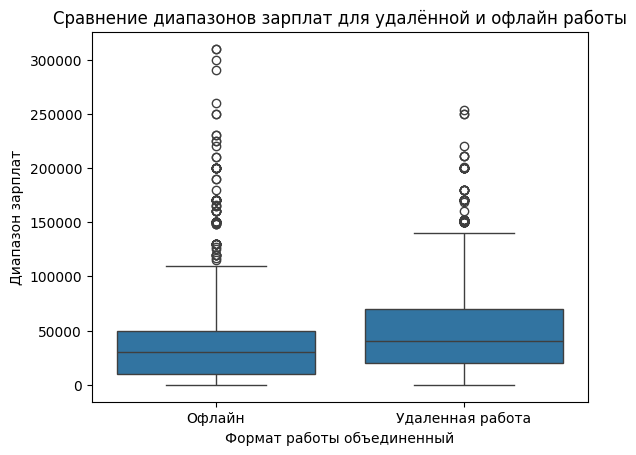

In [12]:
#Влияние гибких форм работы на зарплатный диапазон
# Сравнение зарплат для удалённой и офлайн работы
remote_min = df[df['Формат работы объединенный'] == 'Удаленная работа']['Зарплата от']
remote_max = df[df['Формат работы объединенный'] == 'Удаленная работа']['Зарплата до']
remote_range=remote_max-remote_min
office_min = df[df['Формат работы объединенный'] == 'Офлайн']['Зарплата от']
office_max = df[df['Формат работы объединенный'] == 'Офлайн']['Зарплата до']
office_range=office_max-office_min
t_stat, p_value = ttest_ind(remote_range, office_range)
print(f"\nT-тест для удалённой и офлайн работы: T-statistic={t_stat}, P-value={p_value}")

print("Средний диапазон зарплат для удалённой работы:", remote_range.mean())
print("Средний диапазон зарплат для офлайн работы:", office_range.mean())


sns.boxplot(x='Формат работы объединенный', y=df['Зарплата до'] - df['Зарплата от'], data=df)
plt.title('Сравнение диапазонов зарплат для удалённой и офлайн работы')
plt.ylabel('Диапазон зарплат')
plt.show()

Результаты t-теста показывают, что разница в диапазонах зарплат между удалённой и офлайн работой статистически значима. Это подтверждает нашу гипотезу о том, что гибкие формы работы (удалённая работа) могут влиять на зарплатный диапазон. Диапазон для удалённой работы больше, что указывает на более широкий разброс зарплат, связанный с удалённым форматом работы.

In [13]:
def gini_coefficient(salaries):
    sorted_salaries = np.sort(salaries)
    n = len(sorted_salaries)
    index = np.arange(1, n + 1)
    return (np.sum((2 * index - n - 1) * sorted_salaries)) / (n * np.sum(sorted_salaries))

# Пример использования
salaries = df['Средняя зарплата'].dropna()
gini = gini_coefficient(salaries.values)
print(f"Коэффициент Джини для всей выборки: {gini:.3f}")

Коэффициент Джини для всей выборки: 0.259


<ipython-input-15-64d5440ded4d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gini_by_direction = df.groupby('направление')['Средняя зарплата'].apply(
<ipython-input-15-64d5440ded4d>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gini_by_city = df.groupby('Город')['Средняя зарплата'].apply(
<ipython-input-15-64d5440ded4d>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gini_combined = df.groupby(['Город', 'направл

Неравенство по направлениям:
                             направление  Коэффициент Джини
1                              Маркетинг           0.256634
3  Управление компанией на основе данных           0.255695
0               Количественная экономика           0.254860
4                   Финансы и инвестиции           0.252163
2                   Международный бизнес           0.229156

Неравенство по городам:
             Город  Коэффициент Джини
0           Москва           0.257055
1  Санкт-Петербург           0.246224

Неравенство по комбинациям город-направление:
             Город                            направление  Коэффициент Джини
1           Москва                              Маркетинг           0.260698
0           Москва               Количественная экономика           0.257135
8  Санкт-Петербург  Управление компанией на основе данных           0.252142
3           Москва  Управление компанией на основе данных           0.251929
4           Москва                   Фин

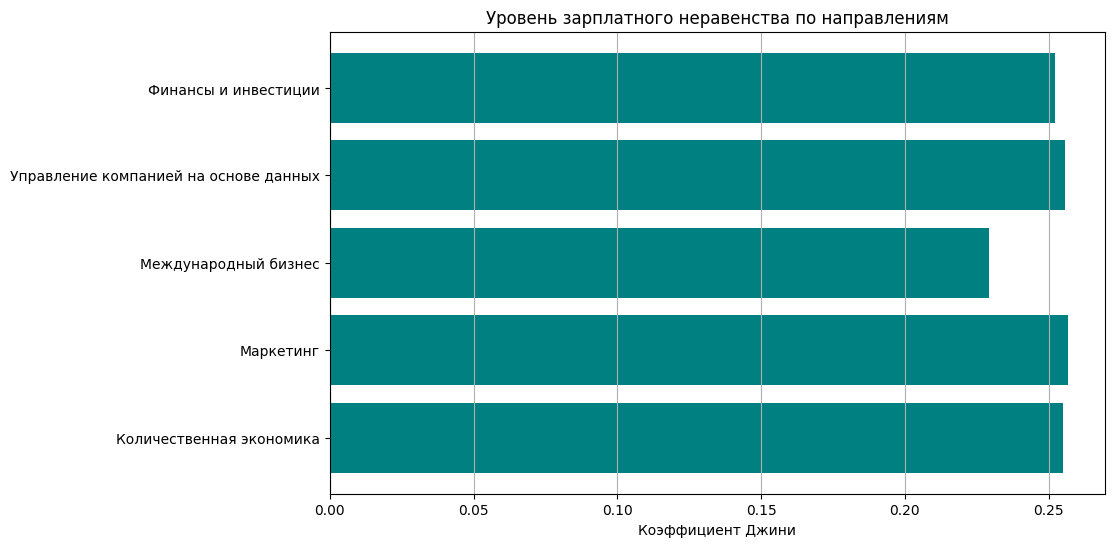

In [15]:
# Расчет коэффициента Джини по направлениям
gini_by_direction = df.groupby('направление')['Средняя зарплата'].apply(
    lambda x: gini_coefficient(x.values) if len(x) > 1 else np.nan
).reset_index(name='Коэффициент Джини')

# Расчет коэффициента Джини по городам
gini_by_city = df.groupby('Город')['Средняя зарплата'].apply(
    lambda x: gini_coefficient(x.values) if len(x) > 1 else np.nan
).reset_index(name='Коэффициент Джини')

# Расчет коэффициента Джини для комбинаций город + направление
gini_combined = df.groupby(['Город', 'направление'])['Средняя зарплата'].apply(
    lambda x: gini_coefficient(x.values) if len(x) > 3 else np.nan
).reset_index(name='Коэффициент Джини')

print("Неравенство по направлениям:")
print(gini_by_direction.sort_values('Коэффициент Джини', ascending=False))

print("\nНеравенство по городам:")
print(gini_by_city.sort_values('Коэффициент Джини', ascending=False))

print("\nНеравенство по комбинациям город-направление:")
print(gini_combined.sort_values('Коэффициент Джини', ascending=False))


plt.figure(figsize=(10, 6))
plt.barh(gini_by_direction['направление'], gini_by_direction['Коэффициент Джини'], color='teal')
plt.title('Уровень зарплатного неравенства по направлениям')
plt.xlabel('Коэффициент Джини')
plt.grid(axis='x')
plt.show()